### Example getting GOES/XRS15 data

Note: several ways of doing and plotting this. The following works but there be more "optimal" ways.

Other resources: [Sunpy doc on getting/plotting XRS](https://docs.sunpy.org/en/stable/generated/gallery/acquiring_data/goes_xrs_example.html#sphx-glr-generated-gallery-acquiring-data-goes-xrs-example-py) and [Manually loading/plotting EXIS/XRS-16/17 data](https://cires-stp.github.io/goesr-spwx-examples/examples/exis/xrs_example.html#sphx-glr-examples-exis-xrs-example-py)

* 22-10-21   IGH
* 
---

In [1]:
#  Import in the usual stuff
import glob
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from sunpy import timeseries as ts
from sunpy.net import Fido
from sunpy.net import attrs as a

In [2]:
#  Here just assuming it save to your sunpy/data dir but can of course change
outdir='/Users/iain/sunpy/data/'

In [3]:
# Search for the data with Fido
trange=a.Time("2010-11-05 12:00","2010-11-05 17:00")
# At moment can only select GOES satellite, not XRS data sets (1sec, avg1min etc) 
# - only really an issue for XRS 16/17
rg15 = Fido.search(trange, a.Instrument("XRS"), a.goes.SatelliteNumber(15))
print(rg15)

Results from 1 Provider:

1 Results from the XRSClient:
Source: https://umbra.nascom.nasa.gov/goes/fits

       Start Time               End Time        Instrument ... Source Provider
----------------------- ----------------------- ---------- ... ------ --------
2010-11-05 00:00:00.000 2010-11-05 23:59:59.999        XRS ...   GOES     NOAA




In [4]:
# Get the file from Fido - can obviously skip this step if already downloaded
# By default downloads to your sunpy/data directory
fg15 = Fido.fetch(rg15,path=outdir)

# GOES data are daily data files, so if timerange crosses 00:00 will get more than one file

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

sci_gxrs-l2-irrad_g15_d20101105_v0-0-0.nc:   0%|          | 0.00/804k [00:00<?, ?B/s]

In [5]:
#  If already downloaded can skip above step and just load back in
fg15=glob.glob(outdir+'*g15*20101105*.nc')
print(fg15)

['/Users/iain/sunpy/data/sci_gxrs-l2-irrad_g15_d20101105_v0-0-0.nc']


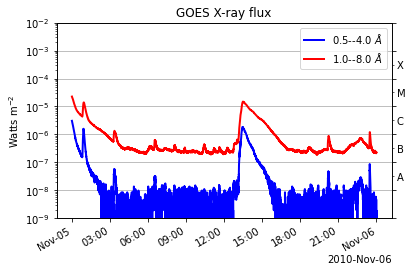

In [6]:
# Timeseries is one way of loading in the netcdf files as this class as knows what to do with them
# see https://docs.sunpy.org/en/stable/api/sunpy.timeseries.sources.XRSTimeSeries.html#sunpy.timeseries.sources.XRSTimeSeries
# just returns the time and a,b channels

# Good idea to always cancatenate incase more than one file
g15 = ts.TimeSeries(fg15, concatenate=True)
# What did timeseries load in
g15.meta
# Quick peek at what timeseries loaded in
g15.peek()

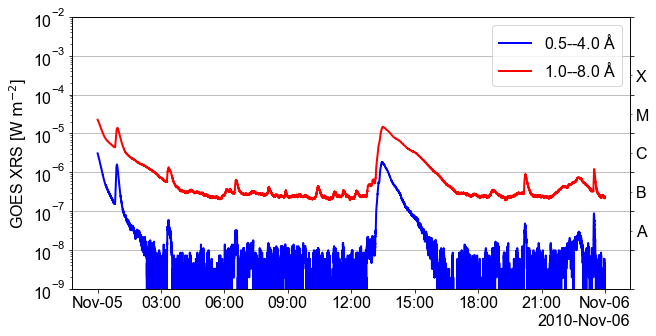

In [7]:
#  Can also plot using the timeseries - though time labelling on x-axis not great (see later cells for fix)
plt.rcParams.update({'font.size': 16,'font.family':"sans-serif",\
                         'font.sans-serif':"Arial",'mathtext.default':"regular"})

fig,ax = plt.subplots(figsize=(10, 5))
g15.plot()
ax.set_ylabel("GOES XRS [$\mathrm{W\;m^{-2}}$] ")
ax.set_yscale("log")
plt.show()

In [8]:
# As GOES files are daily need to truncate timeseries to just time interested in
tg15=g15.truncate(trange.start.iso,trange.end.iso)

In [9]:
# Extract the info from the timeseries class
tg_tims=tg15.index
tg_x05=tg15.quantity("xrsa").value
tg_x18=tg15.quantity("xrsb").value

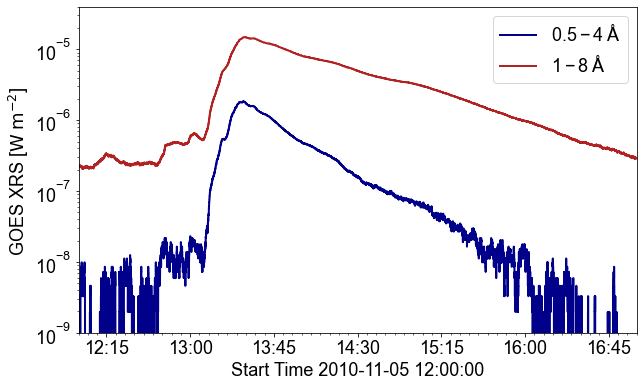

In [10]:
# And now do a more manual of this truncated data
# Some extra lines to make it look nicer, particularly in the time labelling

plt.rcParams.update({'font.size': 18,'font.family':"sans-serif",\
                         'font.sans-serif':"Arial",'mathtext.default':"regular"})

fig,ax = plt.subplots(figsize=(10, 6))
plt.plot(tg_tims,tg_x05,drawstyle='steps-post',marker=None,color='darkblue',lw=2,label='$0.5-4\;\AA$')
plt.plot(tg_tims,tg_x18,drawstyle='steps-post',marker=None,color='firebrick',lw=2,label='$1-8\;\AA$')

ax.set_ylabel("GOES XRS [$\mathrm{W\;m^{-2}}$] ")
ax.set_xlabel("Start Time "+trange.start.iso[:-4])
ax.set_yscale("log")
ax.set_ylim([1e-9,4e-5])
ax.set_xlim([trange.start.datetime,trange.end.datetime])
# precisely control the x time labels
myFmt = matplotlib.dates.DateFormatter('%H:%M')
majorx= matplotlib.dates.MinuteLocator(interval=45)
minorx= matplotlib.dates.MinuteLocator(interval=5)
ax.xaxis.set_major_locator(majorx)
ax.xaxis.set_minor_locator(minorx)
ax.xaxis.set_major_formatter(myFmt)

plt.legend()
plt.show()


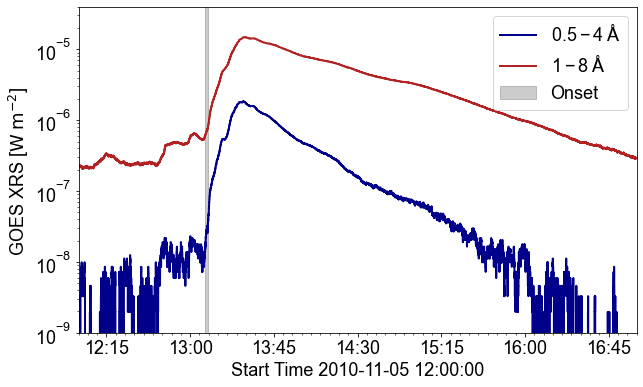

In [11]:
# Can also overplot some interesting times
tho=a.Time("2010-11-05 13:08:00","2010-11-05 13:09:30")

# Just make the font nice
plt.rcParams.update({'font.size': 18,'font.family':"sans-serif",\
                         'font.sans-serif':"Arial",'mathtext.default':"regular"})

fig,ax = plt.subplots(figsize=(10, 6))
plt.plot(tg_tims,tg_x05,drawstyle='steps-post',marker=None,color='darkblue',lw=2,label='$0.5-4\;\AA$')
plt.plot(tg_tims,tg_x18,drawstyle='steps-post',marker=None,color='firebrick',lw=2,label='$1-8\;\AA$')

ax.set_ylabel("GOES XRS [$\mathrm{W\;m^{-2}}$] ")
ax.set_xlabel("Start Time "+trange.start.iso[:-4])
ax.set_yscale("log")
ax.set_ylim([1e-9,4e-5])
ax.set_xlim([trange.start.datetime,trange.end.datetime])
# precisely control the x time labels
myFmt = matplotlib.dates.DateFormatter('%H:%M')
majorx= matplotlib.dates.MinuteLocator(interval=45)
minorx= matplotlib.dates.MinuteLocator(interval=5)
ax.xaxis.set_major_locator(majorx)
ax.xaxis.set_minor_locator(minorx)
ax.xaxis.set_major_formatter(myFmt)

# ax.axvline(tho.start.datetime,color='grey')
ax.axvspan(tho.start.datetime,tho.end.datetime,color='black',alpha=0.2, label='Onset')

plt.legend()
# plt.tight_layout()
# plt.savefig('xflare.pdf')
plt.show()
